In [111]:
pip install wordcloud


   ---------------------------------------- 0.0/299.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.8 kB 495.5 kB/s eta 0:00:01
   ----------------- ---------------------- 133.1/299.8 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.8 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 299.8/299.8 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('zomato_restaurants_in_India.csv')

In [3]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
data.city.nunique()

99

In [5]:
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [6]:
data[data["city"]=="Mumbai"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [7]:
data[data["city"]=="New Delhi"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
53884,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.551540,77.122704,...,1,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.9,Excellent,1545,4321,0.0,-1,-1
53885,18429148,Pa Pa Ya,['Fine Dining'],https://www.zomato.com/ncr/pa-pa-ya-saket-new-...,"Dome, Level 4, Select Citywalk, A-3, District ...",New Delhi,1,"Select Citywalk Mall, Saket",28.528391,77.218611,...,4,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Serves...",4.7,Excellent,3234,8344,0.0,-1,-1
53886,18418277,Ministry Of Beer,['Lounge'],https://www.zomato.com/ncr/ministry-of-beer-co...,"M 44, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633286,77.222787,...,3,Rs.,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.5,Excellent,3043,9984,0.0,-1,-1
53887,18625812,Detroit,['Bar'],https://www.zomato.com/ncr/detroit-connaught-p...,"F40, 2nd Floor, Inner Circle, \nConnaught Plac...",New Delhi,1,Connaught Place,28.631357,77.220251,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.6,Excellent,1327,3255,0.0,-1,-1
53888,18423151,The Darzi Bar & Kitchen,['Casual Dining'],https://www.zomato.com/TheDarziBar?utm_source=...,"H 55, 1st Floor, Outer Circle, Connaught Place...",New Delhi,1,Connaught Place,28.635508,77.219096,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.3,Very Good,3211,9618,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59842,18372693,Three Tuns Cafe & Bar,['Casual Dining'],https://www.zomato.com/ncr/three-tuns-cafe-bar...,"2nd Floor, Unity One Mall, Near Janak Puri Wes...",New Delhi,1,"Unity One Mall, Janakpuri",28.628702,77.076617,...,3,Rs.,"['Debit Card', 'Takeaway Available', 'Dinner',...",4.4,Very Good,975,3139,0.0,-1,-1
59843,18523131,Too Indian,['Casual Dining'],https://www.zomato.com/ncr/too-indian-rajouri-...,"A 39, Vishal Enclave, Rajouri Garden, New Delhi",New Delhi,1,Rajouri Garden,28.650466,77.120146,...,3,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.0,Very Good,2037,7311,0.0,-1,-1
59844,307060,The Beer Cafe - BIGGIE,['Bar'],https://www.zomato.com/ncr/the-beer-cafe-biggi...,"D-2, Inner Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633842,77.220804,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Credit Card', 'Di...",4.1,Very Good,1609,1120,0.0,-1,-1
59845,18500611,Sixth Empirica,['Casual Dining'],https://www.zomato.com/ncr/sixth-empirica-punj...,"Building 6, 2nd & 3rd Floor, NWA, Punjabi Bagh...",New Delhi,1,Punjabi Bagh,28.666524,77.123032,...,3,Rs.,"['Lunch', 'Debit Card', 'Dinner', 'Cash', 'Cre...",4.2,Very Good,1559,2791,0.0,-1,-1


In [8]:
data[data["city"]=="Pune"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [9]:
data.shape

(211944, 26)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [11]:
data[data["average_cost_for_two"]==30000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
136240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
136740,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
137240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1


In [12]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [13]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [14]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape


(55568, 26)

In [15]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [16]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [17]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


In [18]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [19]:
len(data[data["city"]=="Shimla"])

218

In [20]:
len(data[data["city"]=="Agra"])

833

In [21]:
len(data["city"].unique())

99

In [22]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [23]:
data[data["city"]=="Jabalpur"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
82579,18746666,RH Chicken Point,Quick Bites,https://www.zomato.com/jabalpur/rh-chicken-poi...,"Main Road, Sadar Bazaar, Cantt, Jabalpur",Jabalpur,11336,Cantt,23.154664,79.951015,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",4.5,Excellent,680,24,0.0,-1,-1
82580,18745503,Naidu's Dilli Ki Gali Parathe Wali,Quick Bites,https://www.zomato.com/jabalpur/naidus-dilli-k...,"Near Mahakaushal Chamber Bhawan, Marhathal, Ci...",Jabalpur,11336,Napier Town,23.169057,79.933869,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.7,Excellent,355,14,0.0,1,-1
82581,18815413,Riyaz Hotel - 1953,Quick Bites,https://www.zomato.com/jabalpur/riyaz-hotel-19...,"993, Badi Omti, Napier Town, Jabalpur",Jabalpur,11336,Napier Town,23.170673,79.937920,...,2,Rs.,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",4.2,Very Good,542,9,0.0,-1,-1
82582,18746285,Badkul Restaurant,Casual Dining,https://www.zomato.com/jabalpur/badkul-restaur...,"103-105, Deendayal Chowk, Opposite ISBT, ITI R...",Jabalpur,11336,Vijay Nagar,23.193550,79.913353,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Cash', 'Ta...",4.0,Very Good,451,19,0.0,1,-1
82583,18825615,Popular Fresh Momos And More,Quick Bites,https://www.zomato.com/jabalpur/popular-fresh-...,"Home Science College Road, Napier Town, Jabalpur",Jabalpur,11336,Wright Town,23.160413,79.925240,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.1,Very Good,249,43,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85087,18890729,Muskan Family Restaurant,Casual Dining,https://www.zomato.com/jabalpur/muskan-family-...,"Civic Center, Near Bata Showroom, Marhataal, C...",Jabalpur,11336,Civil Lines,23.167616,79.932721,...,1,Rs.,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",0.0,Not rated,3,0,0.0,-1,-1
85088,18859783,Pawar's South Indian & Chines Food,Casual Dining,https://www.zomato.com/jabalpur/pawars-south-i...,"Shop No. 34, Ganjipura Chowk, Ganjipura, Jabal...",Jabalpur,11336,Cantt,23.173200,79.931319,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1
85090,18859976,Swastik Restaurant,Casual Dining,https://www.zomato.com/jabalpur/swastik-restau...,"C/O Hotel Swastik, Building No 333, Napier Tow...",Jabalpur,11336,Cantt,23.162786,79.936645,...,1,Rs.,"['Cash', 'Credit Card', 'Debit Card']",0.0,Not rated,3,0,0.0,-1,-1
85091,18860323,Munna Yadav Bhojanalaya,Casual Dining,https://www.zomato.com/jabalpur/munna-yadav-bh...,"In Front Of Hotel Ankit, South, Civil Lines, J...",Jabalpur,11336,Cantt,23.161508,79.948811,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1


In [24]:
data["locality"].nunique()

3731

In [25]:
data["country_id"].unique()

array([1], dtype=int64)

In [26]:
data["locality_verbose"].nunique()

3910

In [27]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [28]:
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [29]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


In [30]:
print(data["timings"].nunique())
print(data["timings"].unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


In [31]:
data["average_cost_for_two"].nunique()

145

In [32]:
data["price_range"].unique()

array([2, 1, 3, 4], dtype=int64)

In [33]:
data["currency"].unique()

array(['Rs.'], dtype=object)

In [34]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [35]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


In [36]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


In [37]:
data["opentable_support"].unique()

array([ 0., nan])

In [38]:
data["delivery"].unique()

array([-1,  1,  0], dtype=int64)

In [39]:
data["takeaway"].unique()

array([-1], dtype=int64)

In [40]:
outlets = data["name"].value_counts()

In [41]:
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [42]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [43]:
data.shape

(55568, 26)

In [44]:
chains

name
Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: count, Length: 4890, dtype: int64

In [45]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


In [46]:
chains.head(10)

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

In [47]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

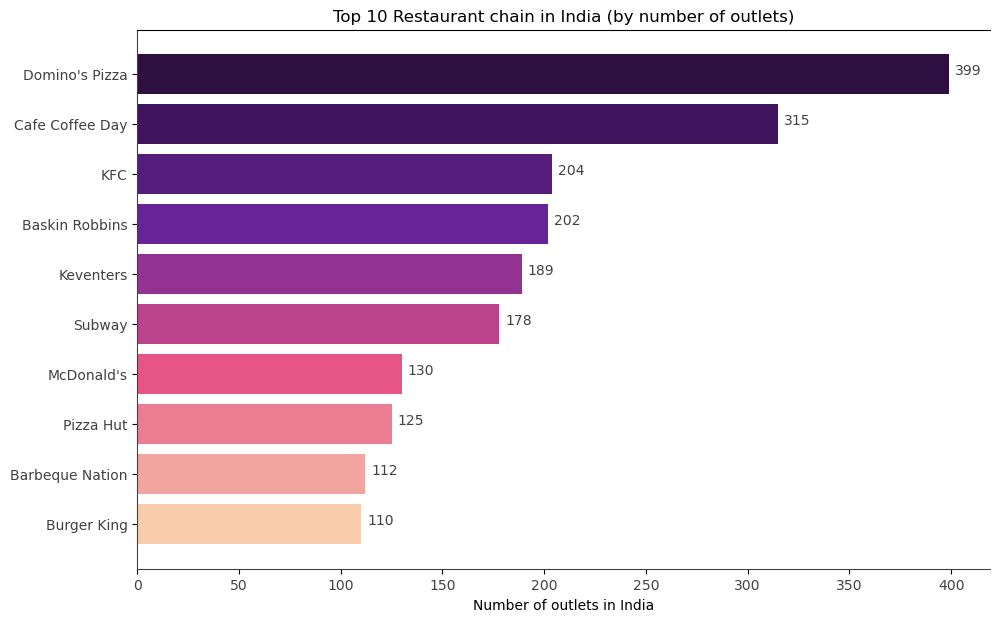

In [48]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

In [49]:
outlets = data["name"].value_counts()

In [50]:
atleast_5_outlets = outlets[outlets > 4]

In [55]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


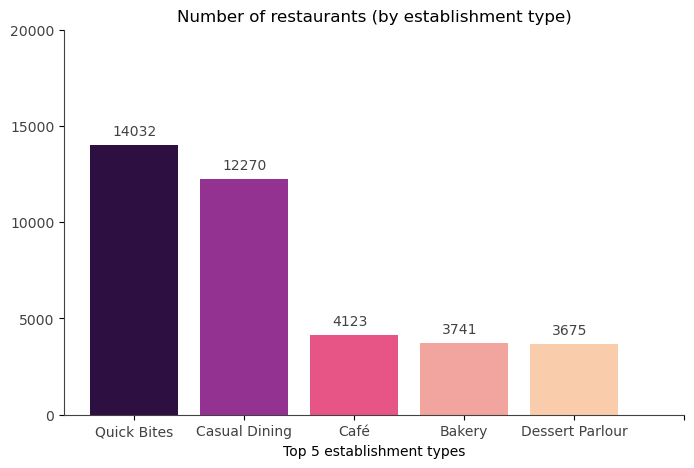

In [51]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

In [52]:
# To check the number of outlets in each of the above establishment type, uncomment to following code

#est_count = data.groupby("establishment").count()["name"].sort_values(ascending=False)
#rating_by_est_map = est_count.index.isin(rating_by_est.index)
#est_count = est_count[rating_by_est_map][rating_by_est.index]
#est_count

In [56]:
data["establishment"] = data["establishment"].apply(lambda x: x[0] if isinstance(x, list) else x)
data.groupby("establishment")["votes"].mean().sort_values(ascending=False).head(10)


establishment
Microbrewery     1992.300000
Pub               880.274510
Bar               500.613295
Lounge            494.509756
Casual Dining     396.339935
Cocktail Bar      309.625000
Club              300.544643
Fine Dining       293.126384
Café              276.558574
Irani Cafe        178.714286
Name: votes, dtype: float64

In [59]:
data.groupby("establishment")["photo_count"].mean().sort_values(ascending=False)[:10]

establishment
Microbrewery     2042.054545
Pub               652.955182
Cocktail Bar      555.625000
Lounge            514.687805
Bar               513.321658
Fine Dining       364.817590
Café              331.935969
Casual Dining     291.550448
Irani Cafe        173.000000
Club              107.089286
Name: photo_count, dtype: float64

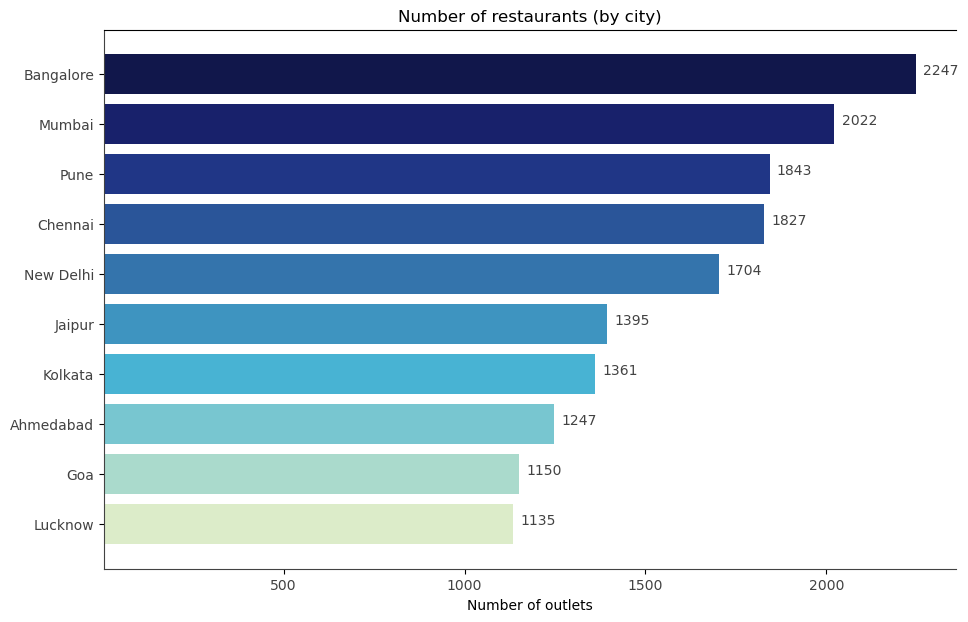

In [60]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

In [62]:
rating_by_city = data.groupby("city")["aggregate_rating"].mean().sort_values(ascending=False)[:10]
rating_by_city

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [63]:
# To check the number of outlets in each of the above establishment type

#city_count = data.groupby("city").count()["name"].sort_values(ascending=False)
#rating_by_city_map = city_count.index.isin(rating_by_city.index)
#city_count = city_count[rating_by_city_map][rating_by_city.index]
#city_count

In [64]:
data.groupby("city")["votes"].mean().sort_values(ascending=False)[:10]

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64

In [65]:
data.groupby("city")["photo_count"].mean().sort_values(ascending=False)[:10]

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

In [66]:
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


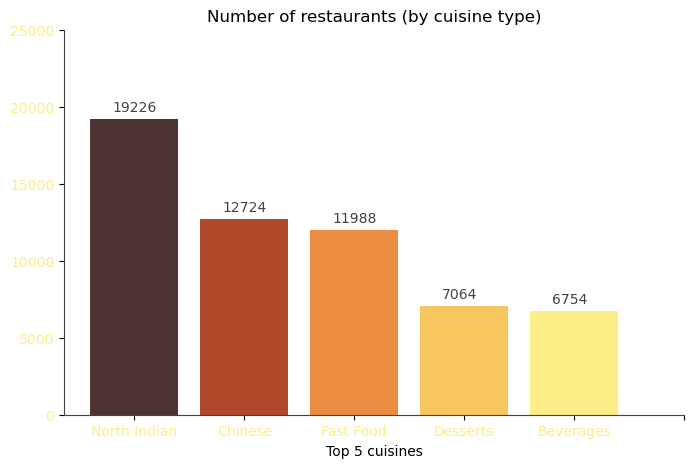

In [82]:
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#fded86")
plt.yticks(range(0, 30000, 5000), color="#fded86")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

In [92]:
data["cuisines2"] = data['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [93]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,0.0,0.0,NaN
South Indian,0.0,0.0,NaN
Mithai,0.0,0.0,NaN
Street Food,0.0,0.0,NaN
Desserts,0.0,0.0,NaN
...,...,...,...
Swedish,0.0,0.0,NaN
Cake,0.0,0.0,NaN
Garhwali,0.0,0.0,NaN
Vegan,0.0,0.0,NaN


In [94]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
North Indian,NaN,0.0
South Indian,NaN,0.0
Mithai,NaN,0.0
Street Food,NaN,0.0
Desserts,NaN,0.0
Mughlai,NaN,0.0
Rolls,NaN,0.0
Chinese,NaN,0.0
Fast Food,NaN,0.0
Bakery,NaN,0.0


In [95]:
print("Total number of unique cuisines = ", hl.nunique())

Total number of unique cuisines =  104


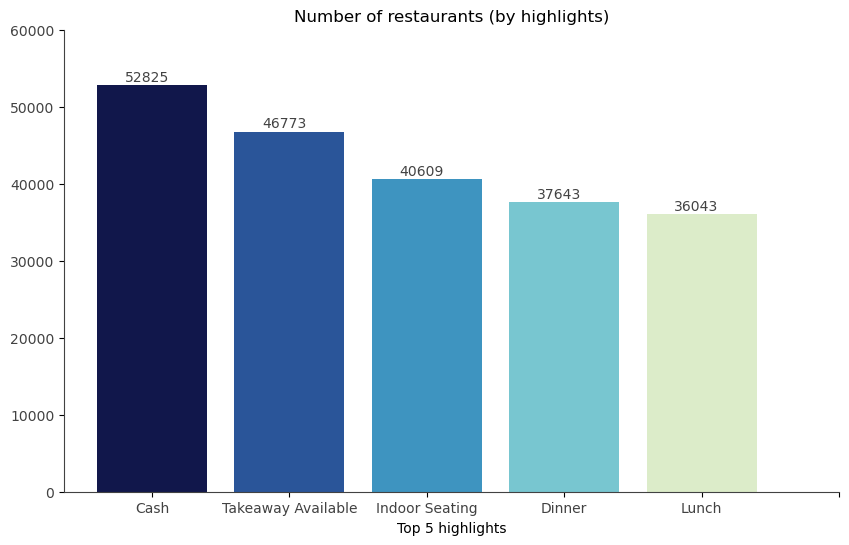

In [96]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()

In [97]:
data["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [103]:
data["highlights2"] = data['highlights'].apply(lambda x : x[2:-2].split("', '"))

hl_list = hl.unique().tolist()
zeros = np.zeros(shape=(len(hl_list),2))
h_and_r = pd.DataFrame(zeros, index=hl_list, columns=["Sum","Total"])

In [104]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

,Sum,Total,Mean
Lunch,0.0,0.0,NaN
Takeaway Available,0.0,0.0,NaN
Credit Card,0.0,0.0,NaN
Dinner,0.0,0.0,NaN
Cash,0.0,0.0,NaN
...,...,...,...
Celebrity Frequented,0.0,0.0,NaN
Alipay Accepted,0.0,0.0,NaN
Subscription Available,0.0,0.0,NaN
Subscription Required,0.0,0.0,NaN


In [105]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Lunch,NaN,0.0
Takeaway Available,NaN,0.0
Credit Card,NaN,0.0
Dinner,NaN,0.0
Cash,NaN,0.0
Air Conditioned,NaN,0.0
Indoor Seating,NaN,0.0
Pure Veg,NaN,0.0
Delivery,NaN,0.0
No Alcohol Available,NaN,0.0


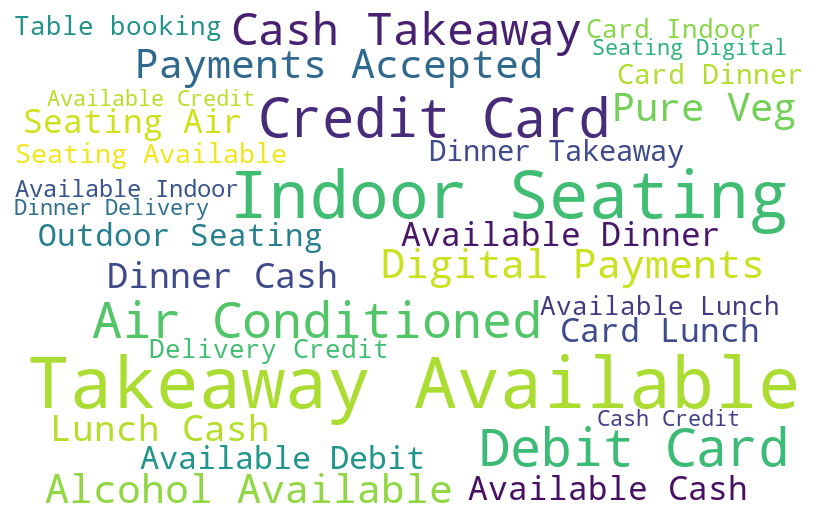

In [113]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

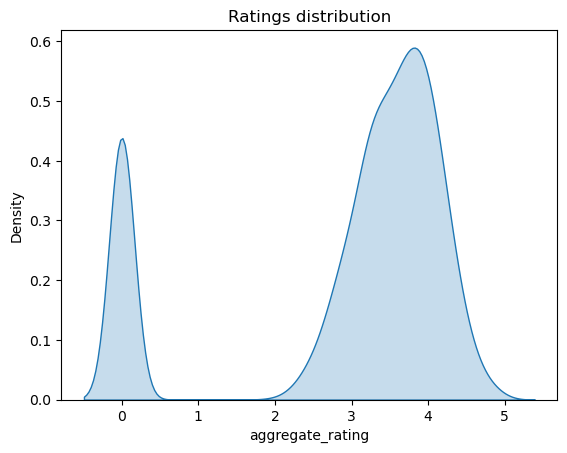

In [116]:
sns.kdeplot(data['aggregate_rating'], fill=True)
plt.title("Ratings distribution")
plt.show()


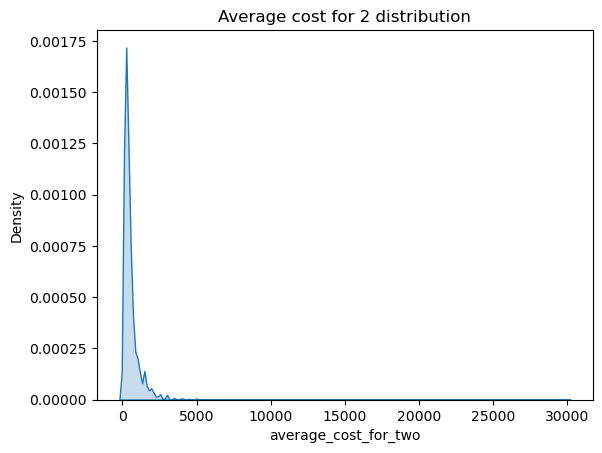

In [117]:
sns.kdeplot(data['average_cost_for_two'], fill=True)
plt.title("Average cost for 2 distribution")
plt.show()

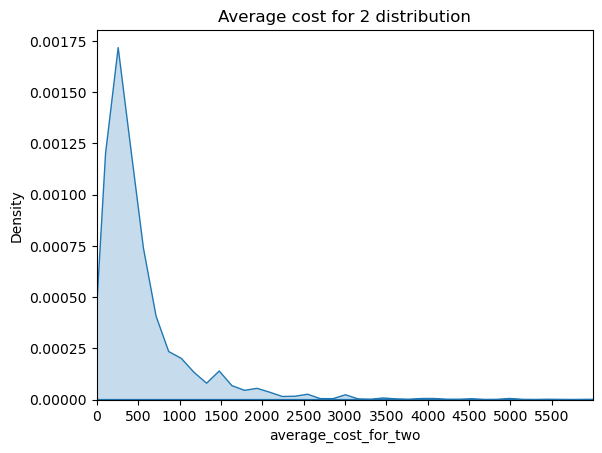

In [119]:
sns.kdeplot(data['average_cost_for_two'], fill=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

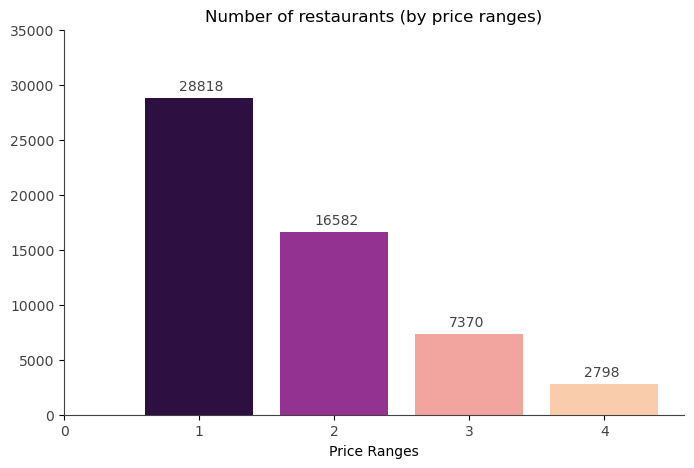

In [120]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()

In [123]:
np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10184\2753989930.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)


0.25

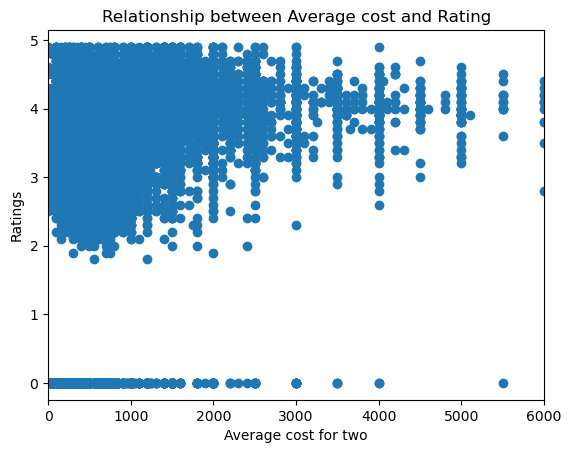

In [124]:
plt.plot("average_cost_for_two","aggregate_rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

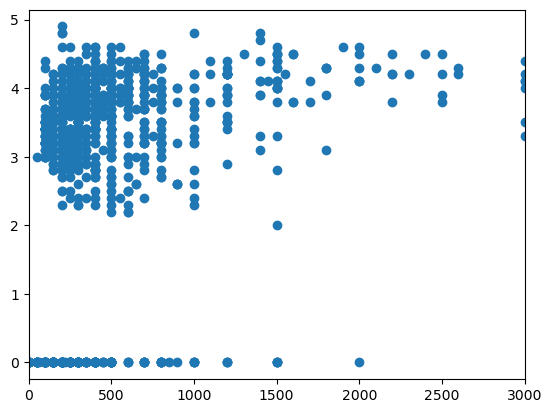

In [125]:
plt.plot("average_cost_for_two","aggregate_rating", data=data.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

In [126]:
np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10184\3032599960.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)


0.25

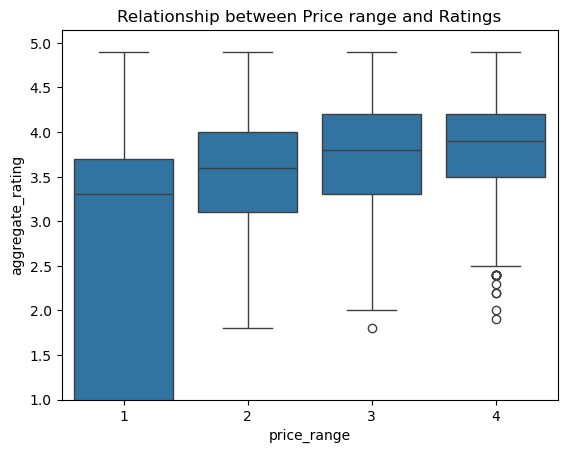

In [127]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

In [128]:
data.to_csv("zomato_final.csv")